# Introduccion


# Importamos librerías

In [3]:
import pandas as pd  # Importamos la libreria pandas para manejo de datos (la llamamos pd para ser breves)
import matplotlib.pylab as plt  # Importamos la librería matplotlib para hacer graficos (la llamamos plt)
# Magia de Jupyter para que los graficos se vean directamente en el notebook
%matplotlib inline 

# Cargamos los datos

Aquí cargamos leemos los datos del CSV usando una rutina que viene de la librería pandas. Esta rutina genera un DataFrame a partir de un CSV. '*pd.*' quiere decir *dentro de la libreria pandas*

In [20]:
df = pd.read_csv('historico-nombres.csv')
df = df[(df.anio>1955) &(df.anio<1995)]

# Análisis exploratorios

En esta sección vamos a intentar darnos una idea general de los datos que están contenidos en el dataset. ¿Cuántos datos hay? ¿Qué tipo de datos son? Primero empecemos viendo un pedacito del dataset. Las primeras filas. Para eso podemos usar el método *head* que nos devuelve las primeras 5 lineas. 
NOTA: si hacemos df.head(8) nos devolverá las primeras 8 filas

In [21]:
df.head()

,nombre,cantidad,anio
1917820,Juan Carlos,6908,1956
1917821,Miguel Angel,5869,1956
1917822,Ana Maria,4955,1956
1917823,Carlos Alberto,4662,1956
1917824,Maria Cristina,4306,1956


Vemos que el dataset tiene solo 3 columnas: nombre, cantidad y anio. La columna del principio que aparece **en negrita** corresponde al índice del dataset y que, a menos que hayamos definido otra cosa, es solamente el número de fila. 
## ¿Cuántos datos hay?

Para ver esto podemos usar la función *len* de python que nos da el 'largo' de los objetos. Vemos que hay unos 4.5 millones de nombres.

In [22]:
len(df)

4516858

## ¿Cuántos nombres *distintos* hay?

En *pandas*, para referirnos solo a la columna nombres del dataset *df* escribimos *df.nombres*. Prueben mostrar solo las primeras 11 filas de la columna nombres acá en la celda de abajo:

In [ ]:
# Completar aca:


Si de una columna nombres queremos contar la cantidad de elementos diferentes, pandas ya nos da un método predefinido para hacerlo: *nunique*

In [23]:
df.nombre.nunique()

1716817

## ¿Cuántas personas hay en el registro?
Para esto habría que sumar todos los números de la columna cantidad. Para eso existe el método: sum

In [26]:
df.cantidad.sum()

34002176

## ¿Qué años comprende el dataset?

Para ver entre que años va nuestro registro podríamos mirar el máximo y mínimo de esa columna. Para eso exiten las  funciones min y max. Completá las celdas de abajo para conseguir la respuesta:

In [ ]:
df.anio. # completar para calcular el mínimo

In [ ]:
df.anio. # completar para calcular el máximo

## ¿Cuáles son los nombres más populares de la historia?

Para esto tenemos que poder agrupar los datos por nombre. La función que nos permite hacer eso se llama *group_by* y tenemos que decirle por cuál columna queremos agrupar. Luego de agrupar podemos aplicar las cosas que ya vimos como elegir la columna *cantidad* y sumar todos sus elementos pero ahora **por grupo**

In [24]:
totales_nombre = df.groupby('nombre').cantidad.sum() #Asignamos el resultado a una variable nueva totales_nombre

Vemos como podemos ir combinando las funciones que ya aprendimos. Para agrupar hacemos df.groupby('columna') para luego elegir una columna particular hacemos .nombre_columna  y finalmente para sumar los valores hacemos .sum()

Es decir que queda: 

    df.groupby('columna').nombre_columna.sum()
    
Ahora solamente nos falta ordenarlo para eso usamos el método *sort_values* con la opcion *ascending=False* para que el orden sea decreciente. Luego, mostramos los primeros 10 elementos.   

In [25]:
totales_nombre.sort_values(ascending=False).head(10)

nombre
Miguel Angel       169448
Juan Carlos        167202
Jose Luis          134849
Carlos Alberto     119626
Luis Alberto        93311
Juan Manuel         79758
Maria Laura         74332
Ana Maria           67935
Maria Alejandra     67522
Julio Cesar         64005
Name: cantidad, dtype: int64

## ¿Cuántas personas hay registradas por año?

Este cálculo es muy parecido al anterior pero agrupando por año en lugar de por nombre. ¿Cómo se escribe esta pregunta en código?

In [30]:
totales_anios =    # Completar! 

Más que ver los años en los que hubo más registros nos va a interesar ver si hay alguna tendencia o comportamiento particular. Para esto un gráfico vale más que mil palabras. Para graficar alcanza con usar el método *plot*:

NOTA: El ; al final de la linea omite el output de texto de matplotlib (sacalo y fijate que pasa)

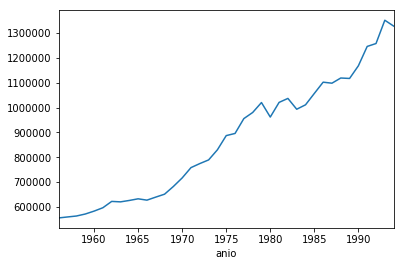

In [37]:
totales_anios.plot();

## ¿Cuántos registros tiene el nombre Juan Carlos por año?

Para poder contestar esta pregunta necesitamos 'filtrar' los datos de alguna manera. Una forma de hacer esto es usando la notación de corchetes. El código básico es 
 
    df[algo]
donde ese *algo* es una forma de decir que parte de la tabla tomar.

Por ejemplo: df['nombre_columna'] es equivalente a df.nombre_columna (pero tiene la ventaja de que funcionna aunque el nombre de la coluna contenga espacios o caracteres raros. 

Ese algo también puede ser una expresión lógica. Por ejemplo para quedarnos solo con los datos a partir de 1960 podríamos hacer:

    df[df.anio >= 1960]
 
 Para quedarnos solo con los datos correspondientes a Juan Carlos hacemos:

In [34]:
df_juan_carlos = df[df.nombre=='Juan Carlos']

y para graficarlos:

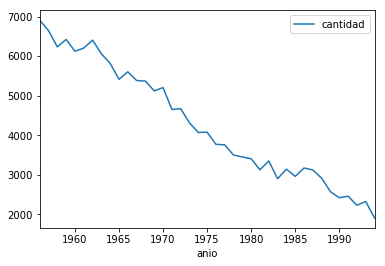

In [41]:
# Fijense que aca usamos otra manera de pedir el grafico eligiendo los valores para el eje 'x' y para el eje 'y'
df_juan_carlos.plot(x='anio', y='cantidad');

# Ejercicios

En esta sección se proponen algunas preguntas de exploración del dataset para que traduzcan a código.

## ¿Cuántos nombres distintos hay cada año?
PISTA: Te van a servir los metodos *group_by* y *nunique*


Hagan el grafico!

In [54]:
# Completen su respuesta aca:





Ignoren la celda que sigue es solo para generar el boton que da la respuesta por si la necesitan:

In [74]:
%%html
<script>
function showme(){
    var text = "distintos_por_anio = df.groupby('anio').nombre.nunique() <br>"
    text = text + "distintos_por_anio.plot()"
    document.getElementById("demo").innerHTML = text;
}
</script>
<button onclick='showme()'>Mostrar respuesta</button>
<p id='demo'>

</p>

## ¿Cuantos Registros tiene Juan Manuel por año?

Mostrar el gráfico

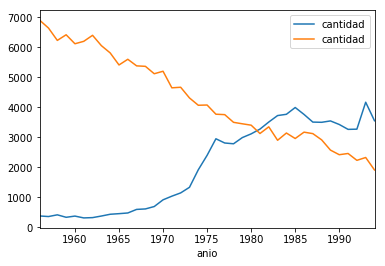

In [73]:
ax = df[df.nombre=='Juan Manuel'].plot(x='anio', y='cantidad')
df[df.nombre=='Juan Carlos'].plot(x='anio', y='cantidad',ax=ax)

## ¿Como se compara la cantidad de Juan Manueles con la de Juan Carlos?

PISTA: Incluí ambos en el mísmo grafico. Para eso dale una variable de salida al método plot de un gráfico y usarlo como input para el otro.

Ejemplo

    mis_ejes = df_juan_carlos